# Name: Snehal Shyam Jagtap


## LOGISTIC REGRESSION

## Step 1: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
train_data = pd.read_csv('Titanic_train.csv')


In [3]:
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
test_data = pd.read_csv('Titanic_test.csv')

In [5]:
print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Visualize the distribution of features

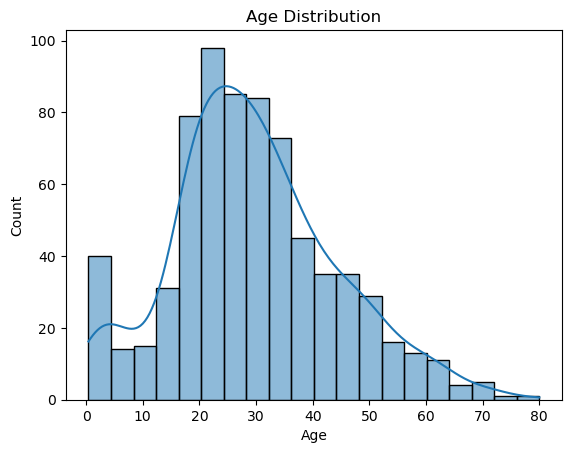

In [8]:
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

### Visualize the relationship between features

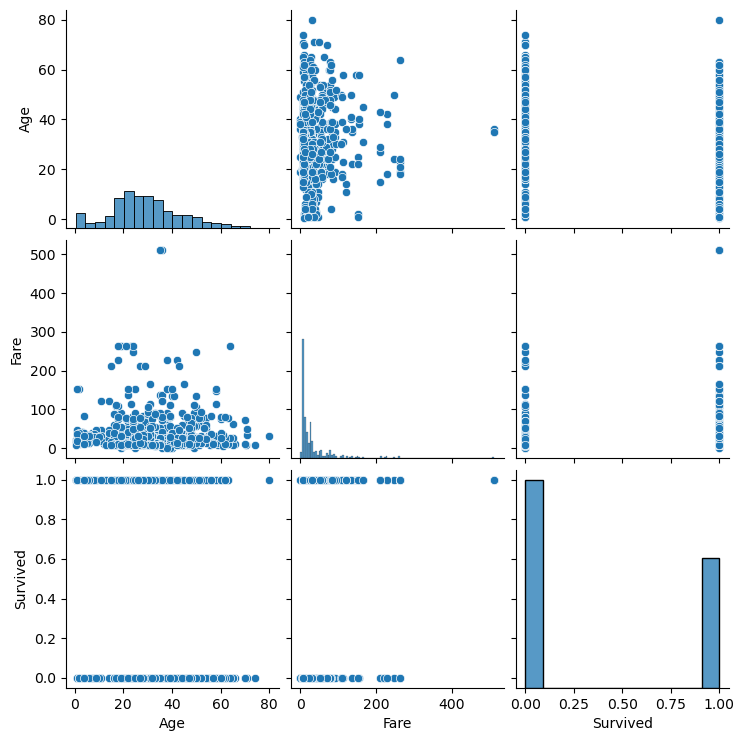

In [9]:

sns.pairplot(train_data[['Age', 'Fare', 'Survived']])
plt.show()

## Step 2 : Data Preprocessing:

In [10]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [11]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [12]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [13]:
# Drop columns that won't be used for training
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
# Separate features and target variable
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.copy()

## Step 3 : Model Building

In [15]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# Build the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=500)

In [18]:
# Predict on the validation set
y_val_pred = model.predict(X_val_split)

## Step 4 : Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [20]:
accuracy = accuracy_score(y_val_split, y_val_pred)

In [21]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8044692737430168


In [22]:
precision = precision_score(y_val_split, y_val_pred)

In [23]:
print(f'Precision: {precision}')

Precision: 0.7746478873239436


In [24]:
recall = recall_score(y_val_split, y_val_pred)

In [25]:
print(f'Recall: {recall}')

Recall: 0.7432432432432432


In [26]:
f1 = f1_score(y_val_split, y_val_pred)

In [27]:
print(f'F1 Score: {f1}')

F1 Score: 0.7586206896551724


In [28]:
roc_auc = roc_auc_score(y_val_split, y_val_pred)

In [29]:
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.7954311454311453


### Visualize the ROC curve

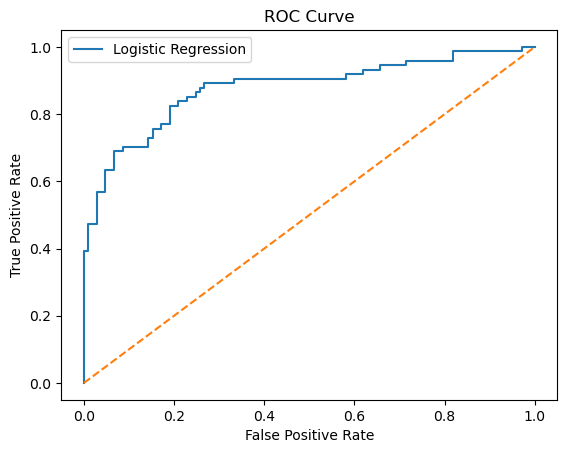

In [30]:

fpr, tpr, _ = roc_curve(y_val_split, model.predict_proba(X_val_split)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Step 5 : Interpretation

In [31]:
# Interpreting coefficients
coefficients = pd.DataFrame(model.coef_[0], X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

             Coefficient
Fare            0.002508
PassengerId     0.000360
Age            -0.030598
Embarked_Q     -0.101704
Parch          -0.116535
SibSp          -0.282141
Embarked_S     -0.400373
Pclass         -0.943398
Sex_male       -2.594214


## Step 6 : Deployment with Streamlit

In [32]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Streamlit App for model deployment
import streamlit as st
import pickle

In [34]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [35]:
# Assuming you saved your model using pickle
# Save model: with open('logistic_model.pkl', 'wb') as f: pickle.dump(model, f)
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title('Titanic Survival Prediction')

2024-10-09 13:16:36.827 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.090 
  command:

    streamlit run C:\Users\sneha\Downloads\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-09 13:16:38.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [36]:
# Assuming this is how you trained your model, with these exact columns:
columns_used_during_training = X_train.columns  # X_train from training step

In [37]:
# User input form for predictions
pclass = st.selectbox('Pclass', [1, 2, 3])  # Corrected 'selectbox'
age = st.slider('Age', 1, 100)
fare = st.slider('Fare', 0, 600)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

2024-10-09 13:16:38.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.151 Session state does not function when running a script without `streamlit run`
2024-10-09 13:16:38.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16

In [38]:
# Prepare the user input with all necessary features in the right order
user_input_dict = {
    'Pclass': [pclass],
    'Age': [age],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],  # Assuming 'Sex_male' was encoded
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0],
    'SibSp': [0],  # Default or can add user input for this
    'Parch': [0],  # Default or can add user input for this
    'PassengerId': [9999],  # Dummy value
}

In [39]:
# Create a DataFrame from user input and ensure the column order matches the training data
user_input_df = pd.DataFrame(user_input_dict)
user_input_df = user_input_df.reindex(columns=columns_used_during_training, fill_value=0)

In [40]:
# Predict survival
prediction = model.predict(user_input_df)[0]

In [41]:
# Display the prediction result
st.write(f'The model predicts that this person {"will survive" if prediction == 1 else "will not survive"}')

2024-10-09 13:16:38.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [42]:
import streamlit as st

st.title("Titanic Survival Prediction")
st.write("This is a simple Streamlit app for predicting survival on the Titanic.")

2024-10-09 13:16:38.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:16:38.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?


## 1. What is the difference between precision and recall?

1. **Precision** measures how many of the positive predictions made by the model are actually correct, focusing on minimizing false positives.
   
2. **Recall** measures how many of the actual positives are correctly identified by the model, focusing on minimizing false negatives.

## 2 What is cross-validation, and why is it important in binary classification?

1. **Cross-validation** is a technique that splits the dataset into multiple subsets (folds), training the model on some folds and testing it on the remaining ones, ensuring that the model's performance is evaluated on different data segments.

2. **Importance in binary classification**: It helps to prevent overfitting by ensuring the model generalizes well across different data samples and provides a more reliable estimate of model performance, especially with imbalanced datasets.